In [1]:
import numpy as np
np.set_printoptions
import pandas as pd
pd.set_option
import matplotlib.pyplot as plt

# (HW) Case 2: Gamma-Gaussian (unknown mu)

In [2]:
from scipy.stats import norm

## 문제설정
X ~ N(20,10) 을 따르는 |X| = 30 의 sample 을 뽑아보자.

In [3]:
# mu parameter
u = 20
# variance parameter
v = 10
# generate sample
N = 30
np.random.seed(101)
data = norm.rvs(u,v, size=N)
print(data)
print(data.size)
print(data.sum())

[47.06849839 26.28132709 29.07969446 25.03825754 26.51117948 16.80681955
 11.51923017 26.05965349 -0.18168244 27.40122057 25.28813494 14.10999467
 21.88695309 12.41127944 10.66762784 29.55056509 21.90794322 39.78757324
 46.0596728  26.83508886 23.02665449 36.93722925  2.93914069  8.40880584
 18.65159279 23.90527843 21.66904636 21.84501859 28.07705914 20.72959675]
30
690.2784538434593


## 데이터만 있는 상태에서 P 의 추정(BY BEYSIAN)

### 1단계 Prior Belief 설정

Prior belief can be in any form (flat, peaked, skewed, bimodal...) as long as the belief satistifies the fundamental axioms of probability. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated.
prior belief 는 아무 form 이나 상관없지만, unknown mu 를 추정할때에는 N 을 쓰는것이 나중 적분에서 더 유리하다. 

Text(0, 0.5, 'p(theta)')

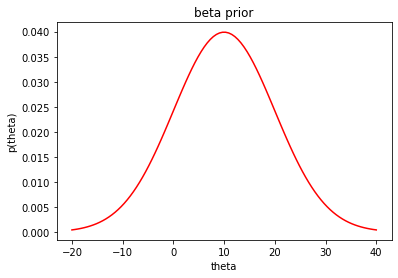

In [4]:
# choose your belief parameter
# 내 믿음은 약간 평균이 작아보였다. 그래서 N(10,10)을 믿음으로 사용하였다. 

u_b=10

v_b=10

prior = norm(10, 10)
theta = np.linspace(-20,40,100)

plt.plot(theta,prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

##  2. Likelihood (Sampling Density) 찾기
Once you have specified your belief, you need to consider  "how likely"  the data is at each point of  p . What you would really come in handy is a plot where every possible choice of  p  is on x-axis and the y-axis shows "how likely the data came from that choice of  p . Likelihood does exactly this.

In [5]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(data,lam,mu):
    N = data.size
    L = lam
    M = mu
    return np.log(L**(N/2))+((-L/2)*sum((data-M)**2))

In [6]:
A=np.zeros(100)
for i in range(0,100):
    A[i] = likelihood(data,10,theta[i])    

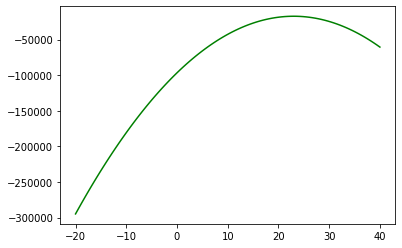

In [7]:
plt.plot(theta, A, color='g')

##3단계 Posterior: Updated Belief 찾아내기

The posterior is defined by strictly applying Bayes Rule;  p(θ|D)=p(θ)p(D|θ)/∫p(θ)p(D|θ)dθ . This is in most cases analytically intractable, but in this case where we have a  conjugacy  between the belief distribution and the sampling distribution, this simply reduces to updating belief paratemers; a, b. Otherwise we have to approximate  p(θ|D)  or use numerical methods, such as MCMC.

In [8]:
# Belief update
def poster(mu):
    u_ML = (1/data.size)*(sum(data))
    lam_ML = 1/((1/data.size)*sum((data-mu)**2))
    lam_0 = 1/10 
    u_0 =10
    lam = 1/10
    lam_N = lam_0 + lam
    u_N = lam_0*u_0/(lam_0+lam) + lam*u_ML/(lam_0+lam)
    return norm.pdf(mu,u_N,1/lam_N)
B=np.zeros(100)
for i in range(0,100):
    B[i] = poster(theta[i])

Text(0, 0.5, 'p(theta)')

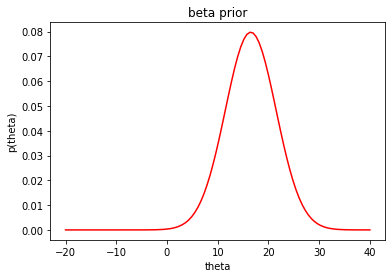

In [9]:
plt.plot(theta,B, color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

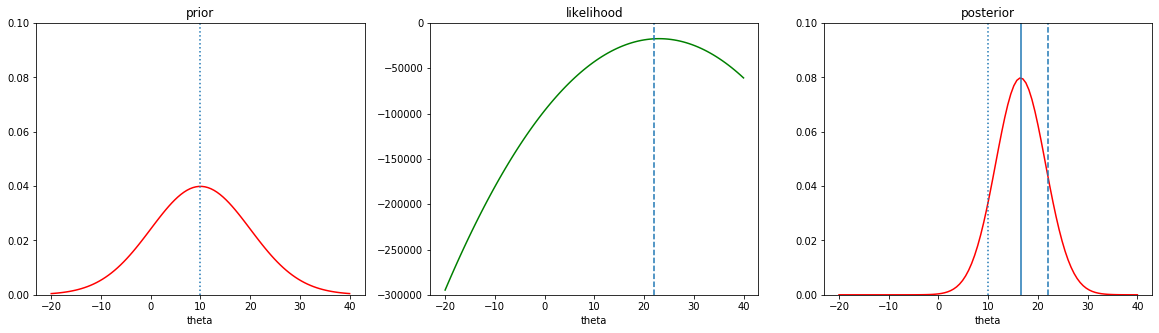

In [18]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta,prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,0.1)
ax1.axvline(10, linestyle=':')

ax2 = fig.add_subplot(132)
ax2.plot(theta, A, color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(-300000,0)
ax2.axvline(22, linestyle='--')

ax3 = fig.add_subplot(133)
ax3.plot(theta,B, color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,0.1)
ax3.axvline(10, linestyle=':')
ax3.axvline(22, linestyle='--')
ax3.axvline(16.5, linestyle='-')

내 믿음이, 데이터를 통해서 20근처로 공고해지고 있음을 알 수 있다.